# Image Compression Using Clustering

In [3]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

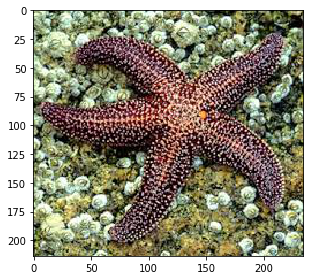

In [11]:
image = io.imread('star.jpg')
io.imshow(image)

In [5]:
image.shape

(214, 235, 3)

In [6]:
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 3)

print(image.shape)
print(image[:5])

(50290, 3)
[[240 253 207]
 [222 235 189]
 [235 248 202]
 [249 255 218]
 [233 249 202]]


In [7]:
kMeans = KMeans(n_clusters = 16)
kMeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
centers

array([[ 62,  51,  36],
       [161, 172, 143],
       [130, 101,  99],
       [238, 248, 226],
       [ 16,   7,   3],
       [130, 131,  84],
       [219, 222, 194],
       [136, 147, 115],
       [187, 200, 166],
       [167, 130, 127],
       [102,  66,  65],
       [209, 168, 161],
       [ 44,  26,  15],
       [102, 107,  73],
       [ 79,  83,  50],
       [172, 166, 103]], dtype=uint8)

In [9]:
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(50290,)
(214, 235)


array([[ 3,  6,  3, ...,  7, 13, 14],
       [ 1,  1,  1, ...,  1, 13,  0],
       [ 0,  7,  8, ..., 13,  0, 12],
       ...,
       [ 7, 13,  5, ..., 14,  4, 14],
       [13, 13,  0, ..., 13,  0,  7],
       [13, 14, 12, ...,  7,  7,  6]], dtype=uint8)

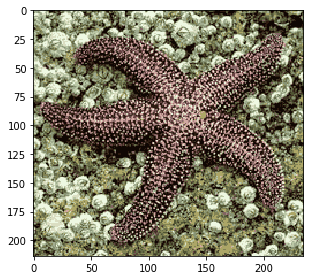

In [10]:
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assign every pixel the rgb color of their label's center
            newImage[i, j, :] = centers[labels[i, j], :]
io.imsave('sk_star.jpg', newImage)

io.imshow(newImage)